In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [81]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [82]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


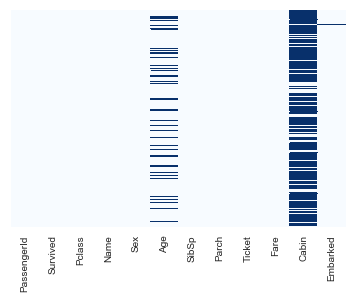

In [84]:
# Missing Data
sns.heatmap(train.isnull(),cmap='Blues', yticklabels=False, cbar=False)

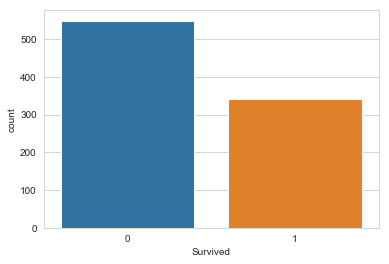

In [85]:
sns.countplot(x='Survived', data=train)

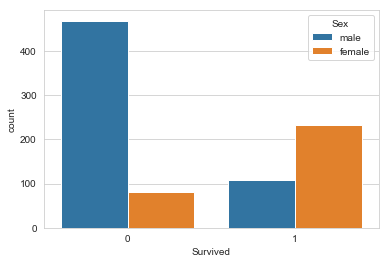

In [86]:
sns.countplot(x='Survived', data=train, hue='Sex')

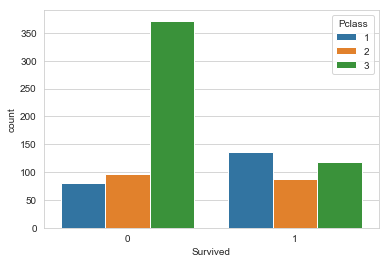

In [87]:
sns.countplot(x='Survived', data = train, hue = 'Pclass')

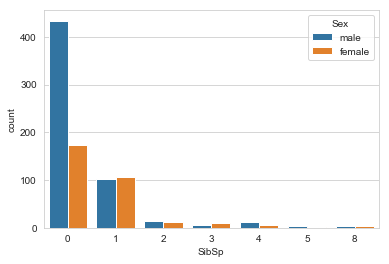

In [88]:
sns.countplot(x='SibSp', data=train, hue='Sex')

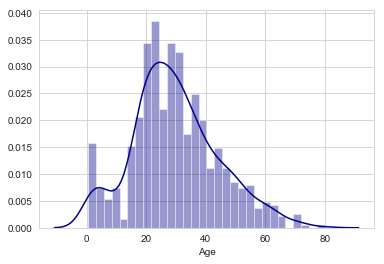

In [21]:
sns.distplot(train['Age'], bins=30, color='darkblue')

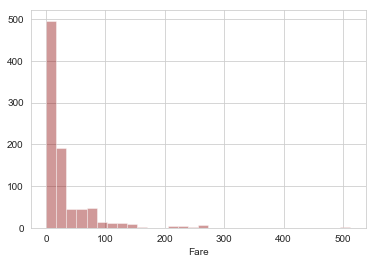

In [23]:
sns.distplot(train['Fare'], bins=30, color='darkred',kde=False)

In [24]:
# data cleaning
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [89]:
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


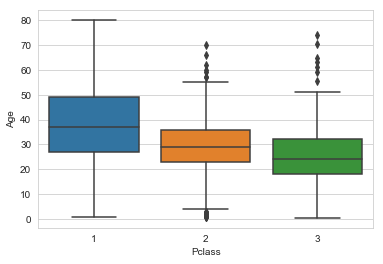

In [90]:
sns.boxplot(x='Pclass', y='Age', data=train)

In [91]:
# imputation
def imputeAge(cols):
    Pclass = cols[0]
    Age = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        elif Pclass == 3:
            return 24
    else:
        return Age
    

In [92]:
train['Age'] = train[['Pclass','Age']].apply(imputeAge, axis = 1)

In [93]:
train['Age'].isnull().values.any()

False

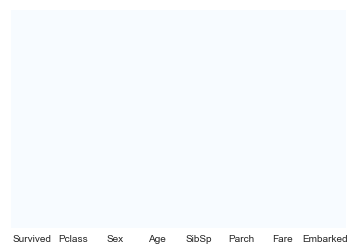

In [94]:
sns.heatmap(train.isnull(),cmap='Blues', yticklabels=False, cbar=False)

In [95]:
# Categorical Values (Sex)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [96]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embarked = pd.get_dummies(train['Embarked'], drop_first= True)
train.drop(['Sex', 'Embarked'], axis = 1, inplace=True)
train = pd.concat([train, sex, embarked], axis =1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [97]:
# Building our model
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis = 1), train['Survived'], test_size=0.3, random_state = 101)

In [99]:
from sklearn.linear_model import LogisticRegression

In [101]:
model = LogisticRegression(solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [102]:
y_pred = model.predict(X_test)

In [103]:
error_rate = np.mean(y_test != y_pred)
error_rate

0.21641791044776118

In [104]:
from sklearn.metrics import confusion_matrix, classification_report

In [105]:
print(confusion_matrix(y_test, y_pred))

[[134  20]
 [ 38  76]]


In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.67      0.72       114

   micro avg       0.78      0.78      0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

